In [57]:
import pandas as pd
import numpy as np
import os, json
import nltk
import importlib

In [58]:
DATAPATH = 'data'
CSV_FILEPATH ="/".join([DATAPATH, 'metadata_ft_subset.csv'])

In [59]:
df = pd.read_csv(CSV_FILEPATH)
print(df.shape)
df.head()

(33499, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,full_body_text
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Rhinoviruses have been associated with 40% to ...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Charles Darwin recognized that the distributio...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,patient group a further significant increase ...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,Since November 2002 (and perhaps earlier) an o...
5,qj4dh6rg,3ed670f60a7be2e3e2a991ea8af1fdd5fa5e2b2c,PMC,Cloaked similarity between HIV-1 and SARS-CoV ...,10.1186/1471-2180-3-20,PMC222911,14499001.0,no-cc,BACKGROUND: Severe acute respiratory syndrome ...,2003-09-21,"Kliger, Yossef; Levanon, Erez Y",BMC Microbiol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,Infection by many enveloped viruses requires f...


In [117]:
import process_tools
importlib.reload(process_tools)

<module 'process_tools' from 'C:\\Users\\Khachatur\\ML-COVID-CORD\\process_tools.py'>

In [61]:
docs = process_tools.extract_simple_docs(df)
len(docs)

33499

In [62]:
stop_words = process_tools.get_stopwords()

In [63]:
len(stop_words)

619

In [85]:
models_df = pd.DataFrame(columns=['model_name', 'model_type', 'num_topics', 'abs_or_full', 'top_n_grams', 'hyperparam_dict', 'avg_topic_coherence', 'rstd_atc'])

In [65]:
docs = process_tools.simple_preprocess(docs)
len(docs)

33499

In [66]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 10896
Number of documents: 33499


In [67]:
lda_model = process_tools.make_lda(dictionary, corpus, 100)
avg_topic_coherence, rstd_atc = process_tools.get_model_stats(lda_model, docs, dictionary, 100, verbose=True)

Average topic coherence:  0.5129402468710557
Relative Standard Deviation of ATC:  0.25703636843256844


In [68]:
list(models_df.columns)

['model_name',
 'model_type',
 'num_topics',
 'abs_or_full',
 'top_n_grams',
 'hyperparam_dict',
 'avg_topic_coherence',
 'rstd_atc']

In [69]:
process_tools.get_current_timestamp()

'2020-04-21 18:41:08'

In [72]:
# num_topics = 100
# model_type = 'lda'
# abs_or_full = 'abs'
# avg_topic_coherence
# top_n_grams = 1
# hyperparam_dict = None
# rstd_atc = rstd_atc

# model_name = model_type + "_" + str(num_topics) + "_" + process_tools.get_current_timestamp()
# models_df = models_df.append({'model_name':model_name, 'num_topics':num_topics, 'model_type':model_type, 'abs_or_full':abs_or_full,
#                       'top_n_grams':top_n_grams, 'hyperparam_dict': hyperparam_dict, 
#                       'avg_topic_coherence':avg_topic_coherence, 'rstd_atc':rstd_atc}, ignore_index=True)

In [81]:
models_df

,model_name,model_type,num_topics,abs_or_full,top_n_grams,hyperparam_dict,avg_topic_coherence,rstd_atc
0,lda_100_2020-04-21 18:41:08,lda,NaN,abs,1,None,0.51294,0.257036
1,lda_100_2020-04-21 18:44:14,lda,100.0,abs,1,None,0.51294,0.257036


In [83]:
models_df = process_tools.add_model_row(models_df, model_type, num_topics, abs_or_full, top_n_grams, hyperparam_dict, avg_topic_coherence, rstd_atc)
models_df

,model_name,model_type,num_topics,abs_or_full,top_n_grams,hyperparam_dict,avg_topic_coherence,rstd_atc
0,lda_100_2020-04-21 18:41:08,lda,NaN,abs,1,None,0.51294,0.257036
1,lda_100_2020-04-21 18:44:14,lda,100.0,abs,1,None,0.51294,0.257036
2,lda_100_2020-04-21 18:49:27,lda,100.0,abs,1,None,0.51294,0.257036


In [84]:
NUM_TOPICS_LIST = [5, 10, 20, 30, 50, 75, 100, 150, 200, 250, 300, 400]

In [87]:
model_type = 'lda'
abs_or_full = 'abs'
top_n_grams = 1
hyperparam_dict = None

for num_topics in NUM_TOPICS_LIST:
    lda_model = process_tools.make_lda(dictionary, corpus, num_topics)
    avg_topic_coherence, rstd_atc = process_tools.get_model_stats(lda_model, model_type, docs, dictionary, corpus, num_topics, verbose=True)
    models_df = process_tools.add_model_row(models_df, model_type, num_topics, abs_or_full, top_n_grams, hyperparam_dict, avg_topic_coherence, rstd_atc)

Average topic coherence:  0.5109752993674965
Relative Standard Deviation of ATC:  0.14939159866450386
Average topic coherence:  0.5396251260862281
Relative Standard Deviation of ATC:  0.08175588495587423
Average topic coherence:  0.5457638871636933
Relative Standard Deviation of ATC:  0.19777863486411232
Average topic coherence:  0.5409271219139696
Relative Standard Deviation of ATC:  0.19673017625328787
Average topic coherence:  0.5388406945546168
Relative Standard Deviation of ATC:  0.2227118157958553
Average topic coherence:  0.5218854388847295
Relative Standard Deviation of ATC:  0.2605068852036861
Average topic coherence:  0.499072191537296
Relative Standard Deviation of ATC:  0.2962086316263285
Average topic coherence:  0.506137839743808
Relative Standard Deviation of ATC:  0.274159787219385
Average topic coherence:  0.4815115566653587
Relative Standard Deviation of ATC:  0.29920472940764853
Average topic coherence:  0.4757073333704673
Relative Standard Deviation of ATC:  0.29521

In [96]:
models_df = models_df.drop(0)

In [97]:
import matplotlib.pyplot as plt

In [106]:
models_df

,model_name,model_type,num_topics,abs_or_full,top_n_grams,hyperparam_dict,avg_topic_coherence,rstd_atc
0,lda_5_2020-04-21 18:58:29,lda,5,abs,1,None,0.510975,0.149392
12,lda_10_2020-04-21 22:11:24,lda,10,abs,1,None,0.529820,0.114499
13,lda_15_2020-04-21 22:13:29,lda,15,abs,1,None,0.521108,0.152109
14,lda_20_2020-04-21 22:15:40,lda,20,abs,1,None,0.519769,0.219951
15,lda_25_2020-04-21 22:17:46,lda,25,abs,1,None,0.534191,0.183415
16,lda_30_2020-04-21 22:19:57,lda,30,abs,1,None,0.566032,0.154706
17,lda_35_2020-04-21 22:22:11,lda,35,abs,1,None,0.533513,0.208648
18,lda_40_2020-04-21 22:24:29,lda,40,abs,1,None,0.527110,0.229682
19,lda_45_2020-04-21 22:27:19,lda,45,abs,1,None,0.553063,0.193561
20,lda_50_2020-04-21 22:30:06,lda,50,abs,1,None,0.552066,0.212562


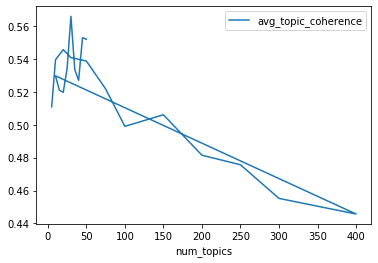

In [104]:
models_df.plot(x ='num_topics', y='avg_topic_coherence', kind = 'line')

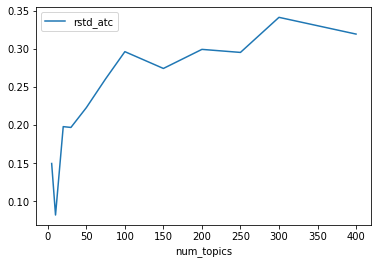

In [99]:
models_df.plot(x ='num_topics', y='rstd_atc', kind = 'line')

In [102]:
model_type = 'lda'
abs_or_full = 'abs'
top_n_grams = 1
hyperparam_dict = None
NUM_TOPICS_LIST = [10, 15, 20, 25, 30, 35, 40, 45, 50]
for num_topics in NUM_TOPICS_LIST:
    lda_model = process_tools.make_lda(dictionary, corpus, num_topics)
    avg_topic_coherence, rstd_atc = process_tools.get_model_stats(lda_model, model_type, docs, dictionary, corpus, num_topics, verbose=True)
    models_df = process_tools.add_model_row(models_df, model_type, num_topics, abs_or_full, top_n_grams, hyperparam_dict, avg_topic_coherence, rstd_atc)

Average topic coherence:  0.5298198605554844
Relative Standard Deviation of ATC:  0.11449871664938668
Average topic coherence:  0.5211084948886866
Relative Standard Deviation of ATC:  0.1521093204329394
Average topic coherence:  0.5197685632496262
Relative Standard Deviation of ATC:  0.21995106550509694
Average topic coherence:  0.5341910211649789
Relative Standard Deviation of ATC:  0.18341538676692598
Average topic coherence:  0.5660316328845071
Relative Standard Deviation of ATC:  0.15470614202401614
Average topic coherence:  0.533513078049149
Relative Standard Deviation of ATC:  0.2086483905297752
Average topic coherence:  0.5271097469749806
Relative Standard Deviation of ATC:  0.2296822653624634
Average topic coherence:  0.5530627173188893
Relative Standard Deviation of ATC:  0.19356136890415862
Average topic coherence:  0.5520663898824378
Relative Standard Deviation of ATC:  0.2125618871277457


In [107]:
models_df = models_df.drop([1,2,3,4]).sort_values(by=['num_topics'])

,model_name,model_type,num_topics,abs_or_full,top_n_grams,hyperparam_dict,avg_topic_coherence,rstd_atc
0,lda_5_2020-04-21 18:58:29,lda,5,abs,1,None,0.510975,0.149392
12,lda_10_2020-04-21 22:11:24,lda,10,abs,1,None,0.529820,0.114499
13,lda_15_2020-04-21 22:13:29,lda,15,abs,1,None,0.521108,0.152109
14,lda_20_2020-04-21 22:15:40,lda,20,abs,1,None,0.519769,0.219951
15,lda_25_2020-04-21 22:17:46,lda,25,abs,1,None,0.534191,0.183415
16,lda_30_2020-04-21 22:19:57,lda,30,abs,1,None,0.566032,0.154706
17,lda_35_2020-04-21 22:22:11,lda,35,abs,1,None,0.533513,0.208648
18,lda_40_2020-04-21 22:24:29,lda,40,abs,1,None,0.527110,0.229682
19,lda_45_2020-04-21 22:27:19,lda,45,abs,1,None,0.553063,0.193561
20,lda_50_2020-04-21 22:30:06,lda,50,abs,1,None,0.552066,0.212562


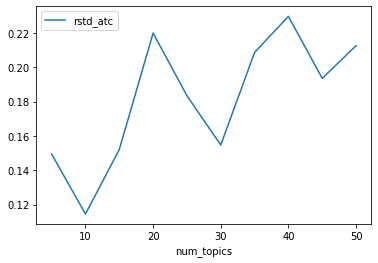

In [110]:
models_df[models_df['num_topics'] <= 50 & models_df['model_type'] == 'lda'].plot(x ='num_topics', y='rstd_atc', kind = 'line')

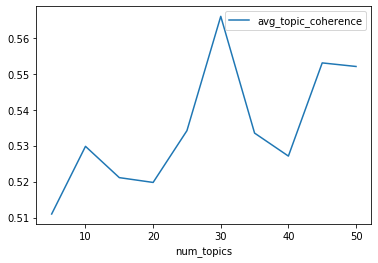

In [111]:
models_df[models_df['num_topics'] <= 50 & models_df['model_type'] == 'lda'].plot(x ='num_topics', y='avg_topic_coherence', kind = 'line')

In [113]:
model_type = 'nmf'
abs_or_full = 'abs'
top_n_grams = 1
hyperparam_dict = None
NUM_TOPICS_LIST = [10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100]
for num_topics in NUM_TOPICS_LIST:
    model = process_tools.make_nmf(dictionary, corpus, num_topics)
    avg_topic_coherence, rstd_atc = process_tools.get_model_stats(model, model_type, docs, dictionary, corpus, num_topics, verbose=True)
    models_df = process_tools.add_model_row(models_df, model_type, num_topics, abs_or_full, top_n_grams, hyperparam_dict, avg_topic_coherence, rstd_atc)

Average topic coherence:  0.5974449770670887
Relative Standard Deviation of ATC:  0.09625930989632936
Average topic coherence:  0.5786185335325753
Relative Standard Deviation of ATC:  0.19017094652250302
Average topic coherence:  0.5930627588300537
Relative Standard Deviation of ATC:  0.21921724275413823
Average topic coherence:  0.5546707797083635
Relative Standard Deviation of ATC:  0.26286280130363177
Average topic coherence:  0.5793607556806758
Relative Standard Deviation of ATC:  0.22209817209735505
Average topic coherence:  0.5884128191581164
Relative Standard Deviation of ATC:  0.2172715798729921
Average topic coherence:  0.5700716539765691
Relative Standard Deviation of ATC:  0.22929744876088592
Average topic coherence:  0.567839331321182
Relative Standard Deviation of ATC:  0.2481030511028652
Average topic coherence:  0.5848070659654655
Relative Standard Deviation of ATC:  0.21344642490377877
Average topic coherence:  0.5808061879800334
Relative Standard Deviation of ATC:  0.2

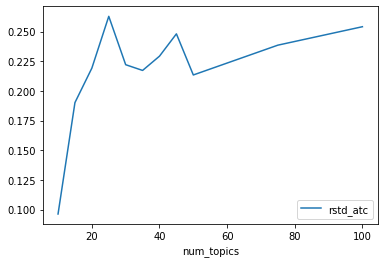

In [114]:
models_df[models_df['model_type'] == 'nmf'].plot(x ='num_topics', y='rstd_atc', kind = 'line')

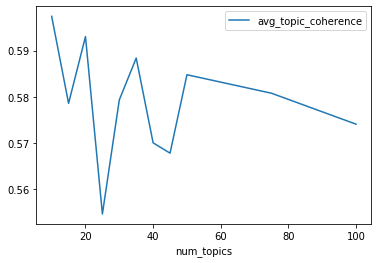

In [115]:
models_df[models_df['model_type'] == 'nmf'].plot(x ='num_topics', y='avg_topic_coherence', kind = 'line')

In [118]:
full_docs = process_tools.extract_full_docs(df)
len(full_docs)

33499

In [120]:
full_docs = process_tools.simple_preprocess(full_docs)
full_docs[0]

['airborne',
 'rhinovirus',
 'detection',
 'effect',
 'ultraviolet',
 'irradiation',
 'detection',
 'semi',
 'nested',
 'rt',
 'pcr',
 'assay',
 'background',
 'rhinovirus',
 'common',
 'cause',
 'upper',
 'respiratory',
 'tract',
 'infections',
 'implicated',
 'asthma',
 'exacerbations',
 'possibly',
 'asthma',
 'deaths',
 'although',
 'method',
 'transmission',
 'rhinoviruses',
 'disputed',
 'several',
 'studies',
 'demonstrated',
 'aerosol',
 'transmission',
 'likely',
 'method',
 'transmission',
 'among',
 'adults',
 'first',
 'step',
 'studies',
 'possible',
 'airborne',
 'rhinovirus',
 'transmission',
 'developed',
 'methods',
 'detect',
 'aerosolized',
 'rhinovirus',
 'extending',
 'existing',
 'technology',
 'detecting',
 'infectious',
 'agents',
 'nasal',
 'specimens',
 'methods',
 'aerosolized',
 'rhinovirus',
 'small',
 'aerosol',
 'chamber',
 'experiments',
 'conducted',
 'decreasing',
 'concentrations',
 'rhinovirus',
 'determine',
 'effect',
 'uv',
 'irradiation',
 'detec

In [122]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
full_dictionary = Dictionary(full_docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
full_dictionary.filter_extremes(no_below=20, no_above=0.5)
full_corpus = [full_dictionary.doc2bow(doc) for doc in full_docs]
print('Number of unique tokens: %d' % len(full_dictionary))
print('Number of documents: %d' % len(full_corpus))

Number of unique tokens: 57596
Number of documents: 33499


In [123]:
num_topics = 30
full_model = process_tools.make_lda(full_dictionary, full_corpus, num_topics)
avg_topic_coherence, rstd_atc = process_tools.get_model_stats(full_model, model_type, full_docs, full_dictionary, full_corpus, num_topics, verbose=True)

Average topic coherence:  0.6209510215609347
Relative Standard Deviation of ATC:  0.21810117954125074


In [124]:
model_type = 'lda'
abs_or_full = 'full'
top_n_grams = 1
hyperparam_dict = None
NUM_TOPICS_LIST = [10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100]
for num_topics in NUM_TOPICS_LIST:
    model = process_tools.make_lda(full_dictionary, full_corpus, num_topics)
    avg_topic_coherence, rstd_atc = process_tools.get_model_stats(model, model_type, full_docs, full_dictionary, full_corpus, num_topics, verbose=True)
    models_df = process_tools.add_model_row(models_df, model_type, num_topics, abs_or_full, top_n_grams, hyperparam_dict, avg_topic_coherence, rstd_atc)

Average topic coherence:  0.5529660645727299
Relative Standard Deviation of ATC:  0.19196034243540722
Average topic coherence:  0.5912842568598754
Relative Standard Deviation of ATC:  0.17778586289945794
Average topic coherence:  0.6306270192680047
Relative Standard Deviation of ATC:  0.13982141089959918
Average topic coherence:  0.6411821430008148
Relative Standard Deviation of ATC:  0.21626990663212026
Average topic coherence:  0.6237185361039707
Relative Standard Deviation of ATC:  0.15023350789045686
Average topic coherence:  0.6516888464710913
Relative Standard Deviation of ATC:  0.1791747265110871
Average topic coherence:  0.6256141299417555
Relative Standard Deviation of ATC:  0.20501410437729872
Average topic coherence:  0.6154279820085973
Relative Standard Deviation of ATC:  0.2025570853386474
Average topic coherence:  0.6271902949159839
Relative Standard Deviation of ATC:  0.2055431729817736
Average topic coherence:  0.6244204349538521
Relative Standard Deviation of ATC:  0.2

In [125]:
model_type = 'nmf'
abs_or_full = 'full'
top_n_grams = 1
hyperparam_dict = None
NUM_TOPICS_LIST = [10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100]
for num_topics in NUM_TOPICS_LIST:
    model = process_tools.make_nmf(full_dictionary, full_corpus, num_topics)
    avg_topic_coherence, rstd_atc = process_tools.get_model_stats(model, model_type, full_docs, full_dictionary, full_corpus, num_topics, verbose=True)
    models_df = process_tools.add_model_row(models_df, model_type, num_topics, abs_or_full, top_n_grams, hyperparam_dict, avg_topic_coherence, rstd_atc)

Average topic coherence:  0.6511239113695506
Relative Standard Deviation of ATC:  0.09110750310391648
Average topic coherence:  0.6345214491015302
Relative Standard Deviation of ATC:  0.1195266544768419
Average topic coherence:  0.6422400834829113
Relative Standard Deviation of ATC:  0.16673619545566437
Average topic coherence:  0.6465157594944831
Relative Standard Deviation of ATC:  0.17258279696355752
Average topic coherence:  0.6439968696920635
Relative Standard Deviation of ATC:  0.18103022364891355
Average topic coherence:  0.6640285448204767
Relative Standard Deviation of ATC:  0.13630460735744404
Average topic coherence:  0.6713510191600147
Relative Standard Deviation of ATC:  0.15846248716335384
Average topic coherence:  0.6736644964383243
Relative Standard Deviation of ATC:  0.16614063745871557
Average topic coherence:  0.6626130161551262
Relative Standard Deviation of ATC:  0.16610483906791748
Average topic coherence:  0.6920259686097878
Relative Standard Deviation of ATC:  0

In [126]:
filepath ="/".join([DATAPATH, 'metadata_models.csv'])
models_df.to_csv(filepath, index_label=False)

In [127]:
models_df

,model_name,model_type,num_topics,abs_or_full,top_n_grams,hyperparam_dict,avg_topic_coherence,rstd_atc
0,lda_5_2020-04-21 18:58:29,lda,5,abs,1,None,0.510975,0.149392
1,lda_10_2020-04-21 22:11:24,lda,10,abs,1,None,0.529820,0.114499
2,lda_15_2020-04-21 22:13:29,lda,15,abs,1,None,0.521108,0.152109
3,lda_20_2020-04-21 22:15:40,lda,20,abs,1,None,0.519769,0.219951
4,lda_25_2020-04-21 22:17:46,lda,25,abs,1,None,0.534191,0.183415
5,lda_30_2020-04-21 22:19:57,lda,30,abs,1,None,0.566032,0.154706
6,lda_35_2020-04-21 22:22:11,lda,35,abs,1,None,0.533513,0.208648
7,lda_40_2020-04-21 22:24:29,lda,40,abs,1,None,0.527110,0.229682
8,lda_45_2020-04-21 22:27:19,lda,45,abs,1,None,0.553063,0.193561
9,lda_50_2020-04-21 22:30:06,lda,50,abs,1,None,0.552066,0.212562


C:\Users\Khachatur\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


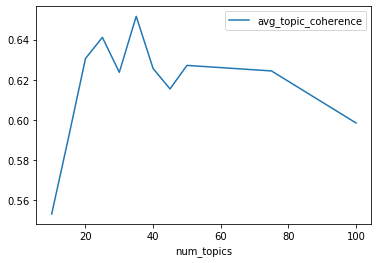

In [137]:
models_df[models_df['abs_or_full'] == 'full'][models_df['model_type'] == 'lda'].plot(x='num_topics', y='avg_topic_coherence', kind = 'line')

In [138]:
models_full_df = models_df[models_df['abs_or_full'] == 'full']

C:\Users\Khachatur\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Khachatur\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


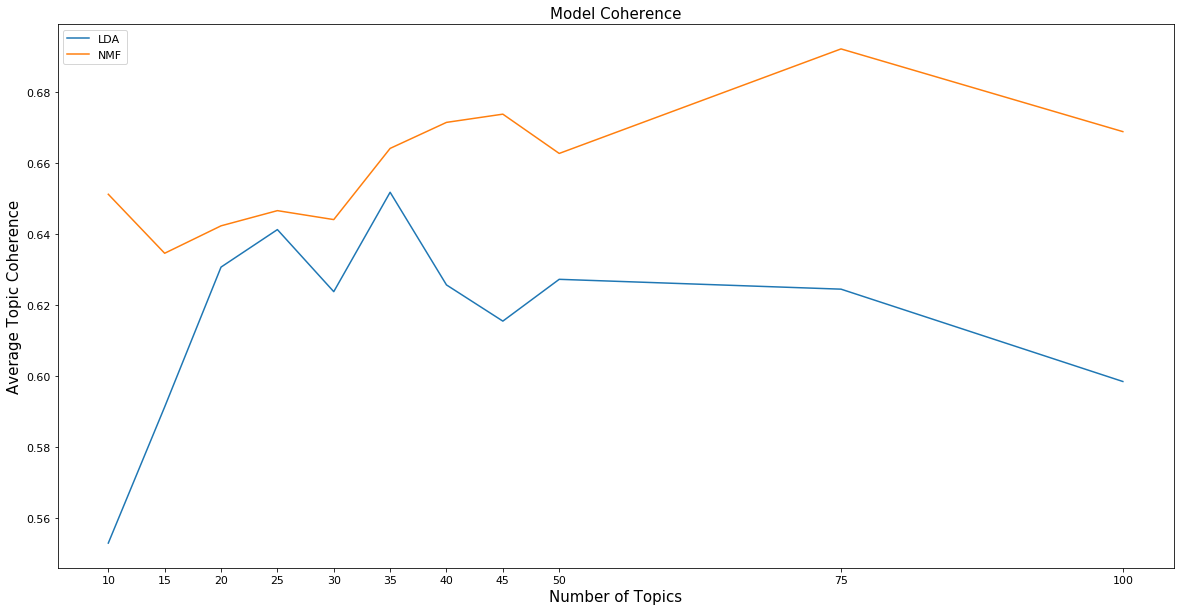

In [166]:
lda_models = models_full_df[models_df['model_type'] == 'lda']
nmf_models = models_full_df[models_df['model_type'] == 'nmf']

plt.figure(figsize=(20,10))
plt.plot(lda_models['num_topics'], lda_models['avg_topic_coherence'])
plt.plot(nmf_models['num_topics'], nmf_models['avg_topic_coherence'])
plt.legend(['LDA', 'NMF'], loc='upper left')
plt.xticks(NUM_TOPICS_LIST)
plt.xlabel('Number of Topics')
plt.ylabel('Average Topic Coherence')
plt.title('Model Coherence')

SMALL_SIZE = 11
MEDIUM_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.savefig('images/model_coherence.png')

C:\Users\Khachatur\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Khachatur\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, 'Topic Coherence Spread')

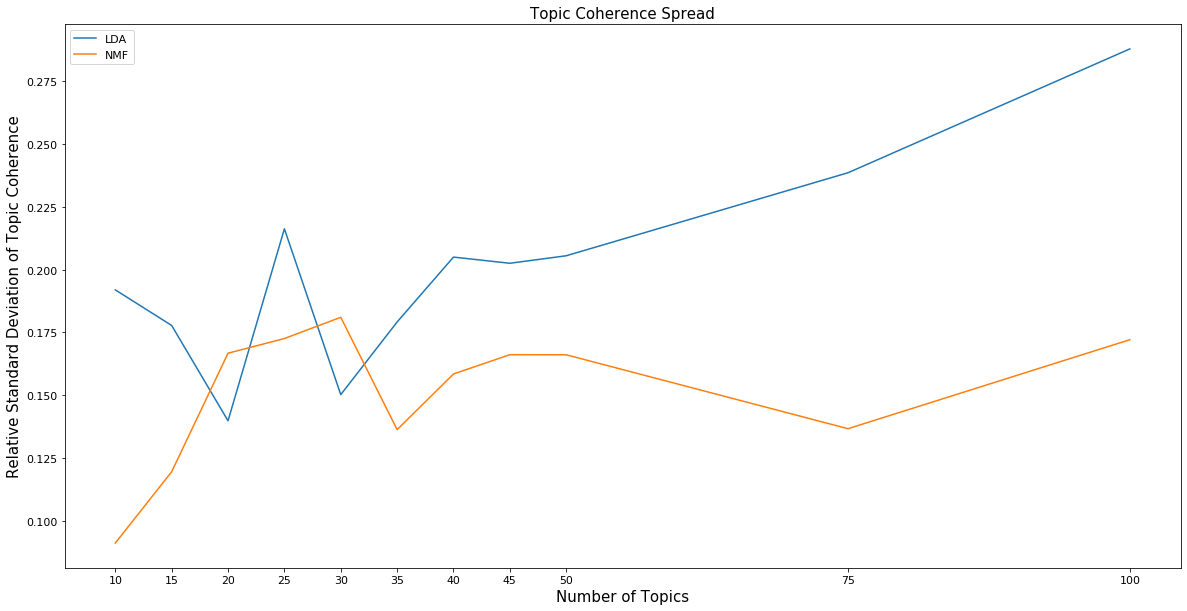

In [168]:
lda_models = models_full_df[models_df['model_type'] == 'lda']
nmf_models = models_full_df[models_df['model_type'] == 'nmf']

plt.figure(figsize=(20,10))
plt.plot(lda_models['num_topics'], lda_models['rstd_atc'])
plt.plot(nmf_models['num_topics'], nmf_models['rstd_atc'])
plt.legend(['LDA', 'NMF'], loc='upper left')
plt.xticks(NUM_TOPICS_LIST)
plt.xlabel('Number of Topics')
plt.ylabel('Relative Standard Deviation of Topic Coherence')
plt.title('Topic Coherence Spread')